In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import clear_output
import pandas as pd
import time
import sklearn.metrics
import seaborn as sns
%matplotlib inline

# GD Iteration Implemetation

In [5]:
def batch_gd(x_data, y_data, theta_0, theta_1, learning_rate, epoch):
    #theta_0,theta_1 are been assumed by 0
    
    error=[]    #list of cost function for every iteration
    theta_00=[]  #list of theta_0 function for every iteration
    theta_11=[]  #list of theta_1 function for every iteration
    gradient_vector=[]
    
    m= len(x_data) # number of observations
    
    for i in range(epoch): 
        
        if len(error) > 2:
            
            if error[-2] - error[-1] < 0.001:
                return error, theta_00, theta_11
            elif np.dot(np.array(error[-2]), np.array(error[-2]))- np.dot(np.array(error[-1]), np.array(error[-1])) < 0.001:
                return error, theta_00, theta_11
            
            
        h = theta_1*x_data+theta_0 # hypothesis fuction
        j= 1/(2*m)*sum((h-y_data)**2) #calculating the cost fuction 
        
        plt.scatter(x_data, y_data) #ploting the data
        clear_output(wait=True)
        
        plt.plot([0,15],[(theta_1*0 + theta_0), (theta_1*15 + theta_0)]) #ploting a line
        r2_score = sklearn.metrics.r2_score(y_data,h) #calculating r2 score for every epoch
        
        print("intercept= "+str(theta_0),"slope= "+str(theta_1),"cost function= "+str(j),
                      "r2_score= "+str(r2_score),sep="\n")
        print("iter no.= "+ str(i))
        
        plt.xlabel("x_data")
        plt.ylabel("y_data")
        plt.title("plotting a line with different parameters (theta_0,theta_1)")
        plt.show()
        time.sleep(0.1)
        
        #Update the parameters (simultaneously)
        theta_0 = theta_0-(learning_rate*(1/m)*sum(h-y_data)) 
        theta_1 = theta_1-(learning_rate*(1/m)*sum((h-y_data)*x_data))
        error.append(j)
        theta_00.append(theta_0)
        theta_11.append(theta_1)
        gradient_vector.append([theta_0, theta_1])

    return error, theta_00, theta_11

In [6]:
df = pd.read_csv('RegData.csv')
df.head()

,x,y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


In [14]:
np.dot(np.array(error[-2]), np.array(error[-2]))

0.04312676091512072

intercept= 0.14642122030015128
slope= 0.8810491917823567
cost function= 0.20537001219738432
r2_score= 0.7423919629959154
iter no.= 19


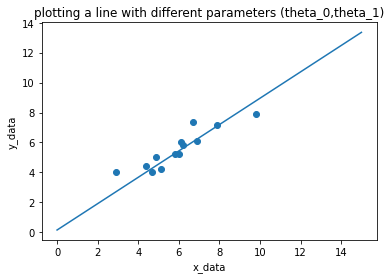

In [8]:
x = np.array(df['x'])
y = np.array(df['y'])

theta_0=0
theta_1=0
learning_rate=0.005
epoch = 100
error, theta_00, theta_11=batch_gd(x, y, theta_0, theta_1, learning_rate, epoch)

Text(0, 0.5, 'cost_function(j)')

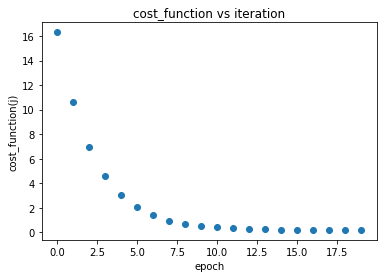

In [9]:
plt.scatter(np.arange(0,len(error)), error)
plt.title("cost_function vs iteration")
plt.xlabel("epoch")
plt.ylabel("cost_function(j)")

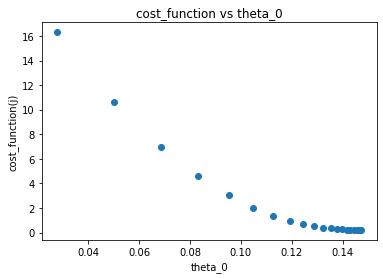

In [10]:
plt.scatter(theta_00, error)
plt.title("cost_function vs theta_0")
plt.ylabel("cost_function(j)")
plt.xlabel("theta_0");

Text(0.5, 0, 'theta_1')

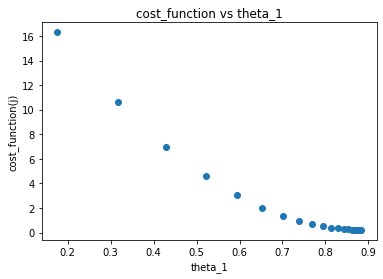

In [11]:
plt.scatter(theta_11, error)
plt.title("cost_function vs theta_1")
plt.ylabel("cost_function(j)")
plt.xlabel("theta_1")

# GD vectorize Implementation

In [16]:
def batch_gd_vact(x_data, y_data, theta_0, theta_1, learning_rate, epoch):
    #theta_0,theta_1 are been assumed by 0
    
    error=[]    #list of cost function for every iteration
    theta_00=[]  #list of theta_0 function for every iteration
    theta_11=[]  #list of theta_1 function for every iteration
    
    m= len(x_data) # number of observations
    
    for i in range(epoch): 
        
        if len(error) > 2:
            if error[-2] - error[-1] < 0.001:
                return error, theta_00, theta_11
        
        h = theta_1*x_data+theta_0 # hypothesis fuction
        e = h-y_data #error
        
        j= 1/(2*m)*np.dot(e,e) #calculating the cost fuction 
        
        plt.scatter(x_data, y_data) #ploting the data
        clear_output(wait=True)
        
        plt.plot([0,15],[(theta_1*0 + theta_0), (theta_1*15 + theta_0)]) #ploting a line
        r2_score = sklearn.metrics.r2_score(y_data,h) #calculating r2 score for every epoch
        
        print("intercept= "+str(theta_0),"slope= "+str(theta_1),"cost function= "+str(j),
                      "r2_score= "+str(r2_score),sep="\n")
        print("iter no.= "+ str(i))
        
        plt.xlabel("x_data")
        plt.ylabel("y_data")
        plt.title("plotting a line with different parameters (theta_0,theta_1)")
        plt.show()
        time.sleep(0.1)
        
        #Update the parameters (simultaneously)
        e = h-y_data #error
        theta_0 = theta_0-(learning_rate*(1/m)*np.sum(e))
        theta_1 = theta_1-(learning_rate*(1/m)*np.dot(e,x_data))
        error.append(j)
        theta_00.append(theta_0)
        theta_11.append(theta_1)
        

    return error, theta_00, theta_11

intercept= 0.1466083616177742
slope= 0.8851638413332045
cost function= 0.20340751178872754
r2_score= 0.7448536460453759
iter no.= 9


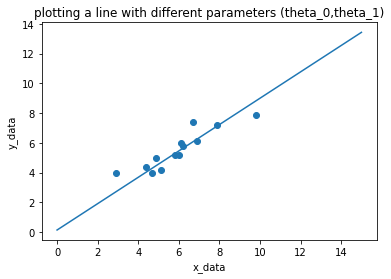

In [17]:
x = np.array(df['x'])
y = np.array(df['y'])

theta_0=0
theta_1=0
learning_rate=0.01
epoch = 10
error, theta_00, theta_11=batch_gd_vact(x, y, theta_0, theta_1, learning_rate, epoch)